In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import anndata
import scvi

import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = '../results/images/integrated/SoC_maternalFoetal/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=200)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
absl                NA
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiw

'/opt/conda/bin/python'

In [3]:
def identityTransfer(adata_CellsNewID, adata, field='identity'):
    
    '''
    Function to transfer the value in a .obs column, modifying only the cells included in adata_CellsNewID
    
    Parameters:
        adata_CellsNewID: anndata object with cells. These should have in their .obs[field] the new values to be transfer to adata
        adata: anndata object to modify. The value in .obs[field] will be modifies for all the cells in adata_CellsNewID
        field: column name in .obs to operate in
        
    '''
    
    #converting categorical into strings to introduce new categories
    adata.obs[field]=adata.obs[field].astype("string")


    #assigning the new categories to the cells in adata
    for cell in adata_CellsNewID.obs.index:
        adata.obs[field][cell] = adata_CellsNewID.obs[field][cell]

    #Returning strings into categorical 
    adata.obs[field]=adata.obs[field].astype("category")
    
    return(adata)

In [4]:
#Function to add the souporcell id

def add_souporcell_id(adata_obj, cell_id):
    '''
    Function to add the souporcell status (e.g. 0,1, not pooled, etc.) to the cells
    
    Input
        adata_obj: adata object
        cell_id: id of a cell
    
    '''
    
    curr_sample = adata_obj.obs.loc[cell_id, 'sample']
    
    #print('sample',sample, 'barcode', cell_id)
    
    if curr_sample in samples:
        #print(curr_sample)
        #extracts the table contained in the indicated key of the dictionary
        curr_souporcell_table = souporcell_clusters[curr_sample]
        
        if (cell_id in list(curr_souporcell_table.index)): #checking that the cells are into the data
            curr_assign = souporcell_clusters[curr_sample].loc[cell_id,'assignment']
            #print('returning',curr_assign)
            return(curr_assign)

        else:
            # cell barcode is filtered by souporcell
            return('filtered_by_souporcell')
    else:
        return('not_available')

In [ ]:
adata= sc.read('../results/scVI/S2_scVIintegrated_adata_latent30_cleanV3.h5ad')

In [221]:
sc.settings.figdir = '../results/images/integrated/clean/'

### Endotelial cells

In [98]:
endo = adata[adata.obs['identity'] == 'Endo l']

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [99]:
#COpying the value of the leiden cluster. The new column will help to change it's values for
# the cluster identity

#Function that changes the cluster names as indicated
endo.obs['identity'] = (endo.obs["identity"].map(lambda x: 
                            { "Endo l": "Endo f"}
                            .get(x, x)).astype("category"))

Trying to set attribute `.obs` of view, copying.


In [100]:
adata= identityTransfer(endo, adata)

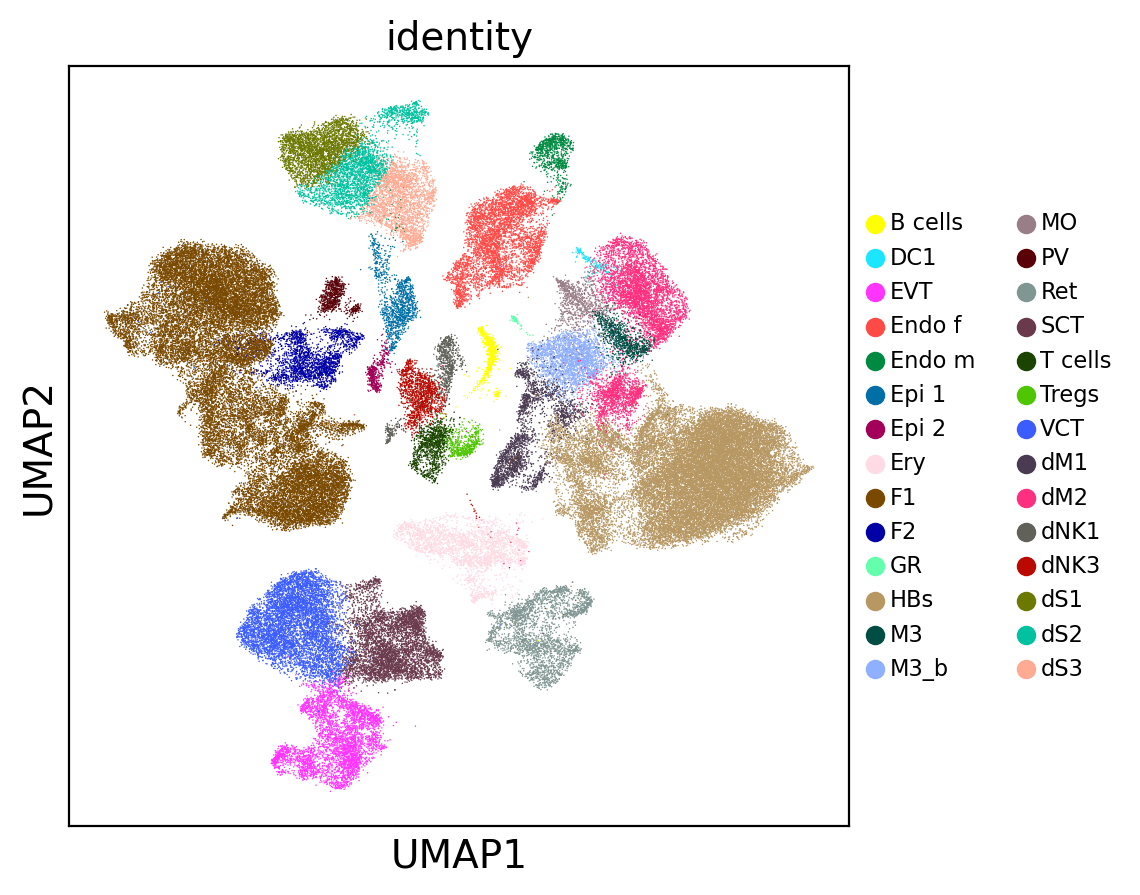

In [101]:
# use scVI imputed values for plottin
sc.pl.umap(adata, color=['identity' ],legend_fontsize='xx-small',
           save='_scVI_latent30_cleanV3.pdf')

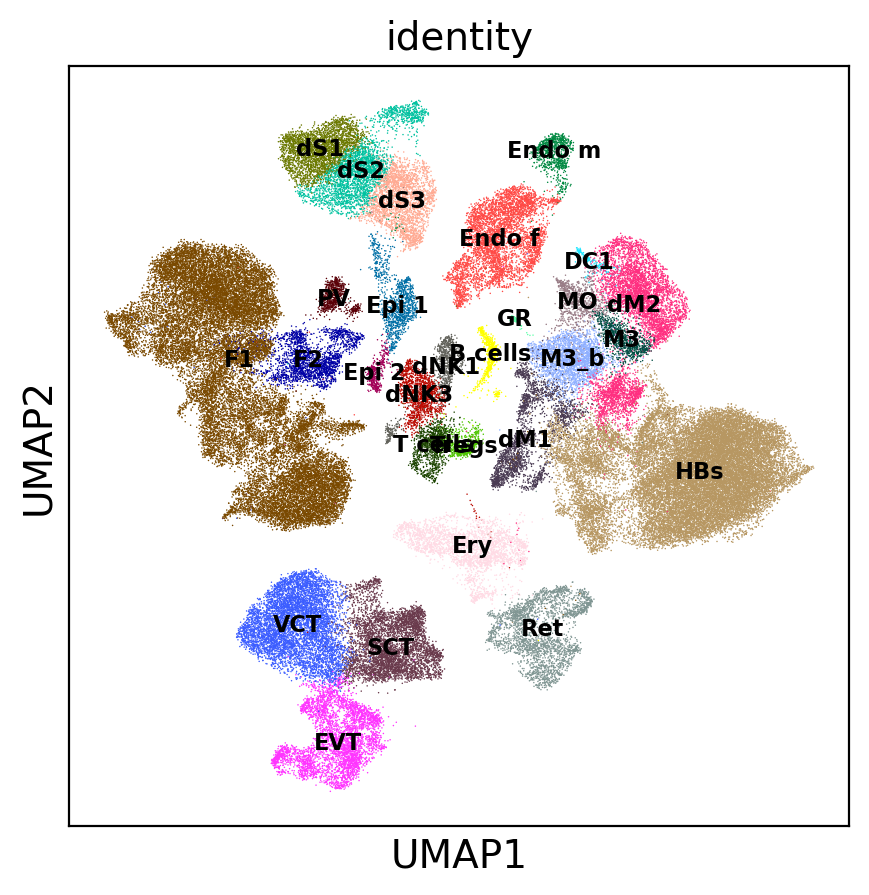

In [102]:
# use scVI imputed values for plottin
sc.pl.umap(adata, color=['identity' ],legend_fontsize='xx-small',legend_loc= 'on data',
           save='_scVI_latent30_cleanV3_ondata.pdf')

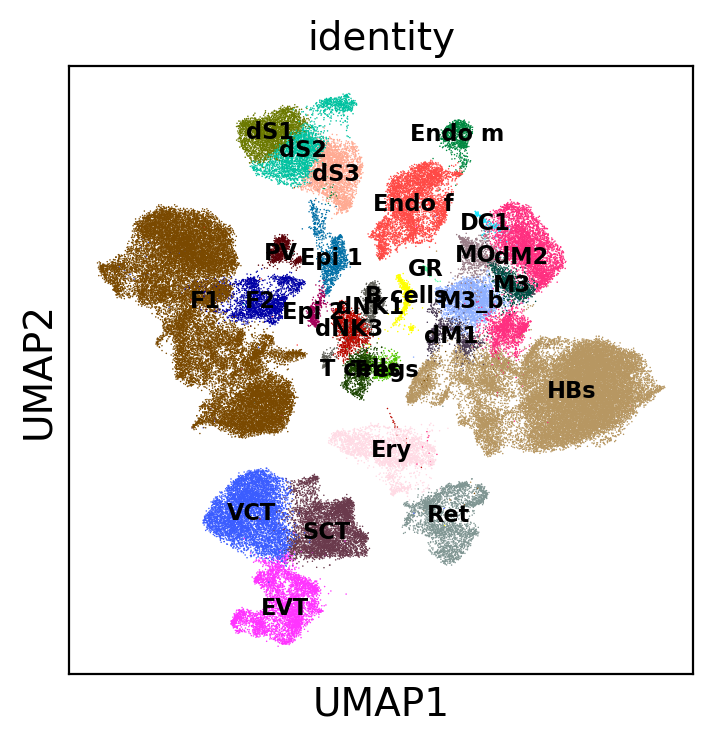

In [12]:
# use scVI imputed values for plottin
sc.pl.umap(adata, color=['identity' ],legend_fontsize='xx-small',legend_loc= 'on data')

In [13]:
adata.write('../results/scVI/S2_scVIintegrated_adata_latent30_cleanV4.h5ad')

In [5]:
#adata= sc.read('../results/scVI/S2_scVIintegrated_adata_latent30_cleanV4.h5ad')

## ----------


## Removing maternal contamination to keep only fetal cells and maternal M3

In [14]:
#New destination for the images
sc.settings.figdir = '../results/images/integrated/fetal_subset/'

In [15]:
#Selecting the cells in the desired clusters
temp_cells = adata[adata.obs['identity'] == 'HBs']
temp_cells2= adata[adata.obs['identity'] == 'M3']
temp_cells3= adata[adata.obs['identity'] == 'M3_b']

temp_cells4= adata[adata.obs['identity'] == 'VCT']
temp_cells5= adata[adata.obs['identity'] == 'EVT']
temp_cells6= adata[adata.obs['identity'] == 'SCT']

temp_cells7= adata[adata.obs['identity'] == 'F1']
temp_cells8= adata[adata.obs['identity'] == 'F2']

temp_cells9= adata[adata.obs['identity'] == 'Endo f']




fetal_adata = temp_cells.concatenate(temp_cells2,temp_cells3,temp_cells4,temp_cells5,temp_cells6,
                                    temp_cells7, temp_cells8, temp_cells9, index_unique=None)

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [16]:
del(temp_cells,temp_cells2,temp_cells3,temp_cells4,temp_cells5,temp_cells6,temp_cells7,
   temp_cells8, temp_cells9)

... storing 'sample' as categorical
... storing 'donor' as categorical
... storing 'termination' as categorical
... storing 'day' as categorical
... storing 'pcw' as categorical
... storing 'souporcell_id' as categorical
... storing 'donor_deconv' as categorical
... storing 'donor_souporcell' as categorical
... storing 'leiden_pca' as categorical
... storing 'leiden_scvi' as categorical
... storing 'celltype_predictions' as categorical
... storing 'souporcell_MFgenotype' as categorical
... storing 'identity' as categorical
... storing 'souporcell_MFidentity' as categorical


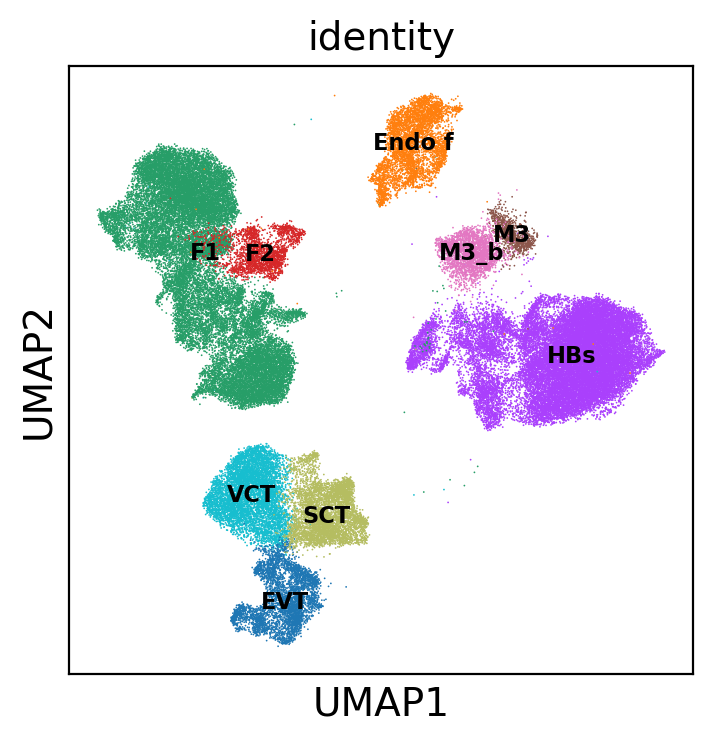

In [17]:
# use scVI imputed values for plottin
sc.pl.umap(fetal_adata, color=['identity' ],legend_fontsize='xx-small',legend_loc= 'on data',
          save='_scVI_latent30_cleanV4_fetal.pdf')

In [18]:
fetal_adata.write('../results/scVI/S2_scVIintegrated_adata_latent30_cleanV4_fetal.h5ad')

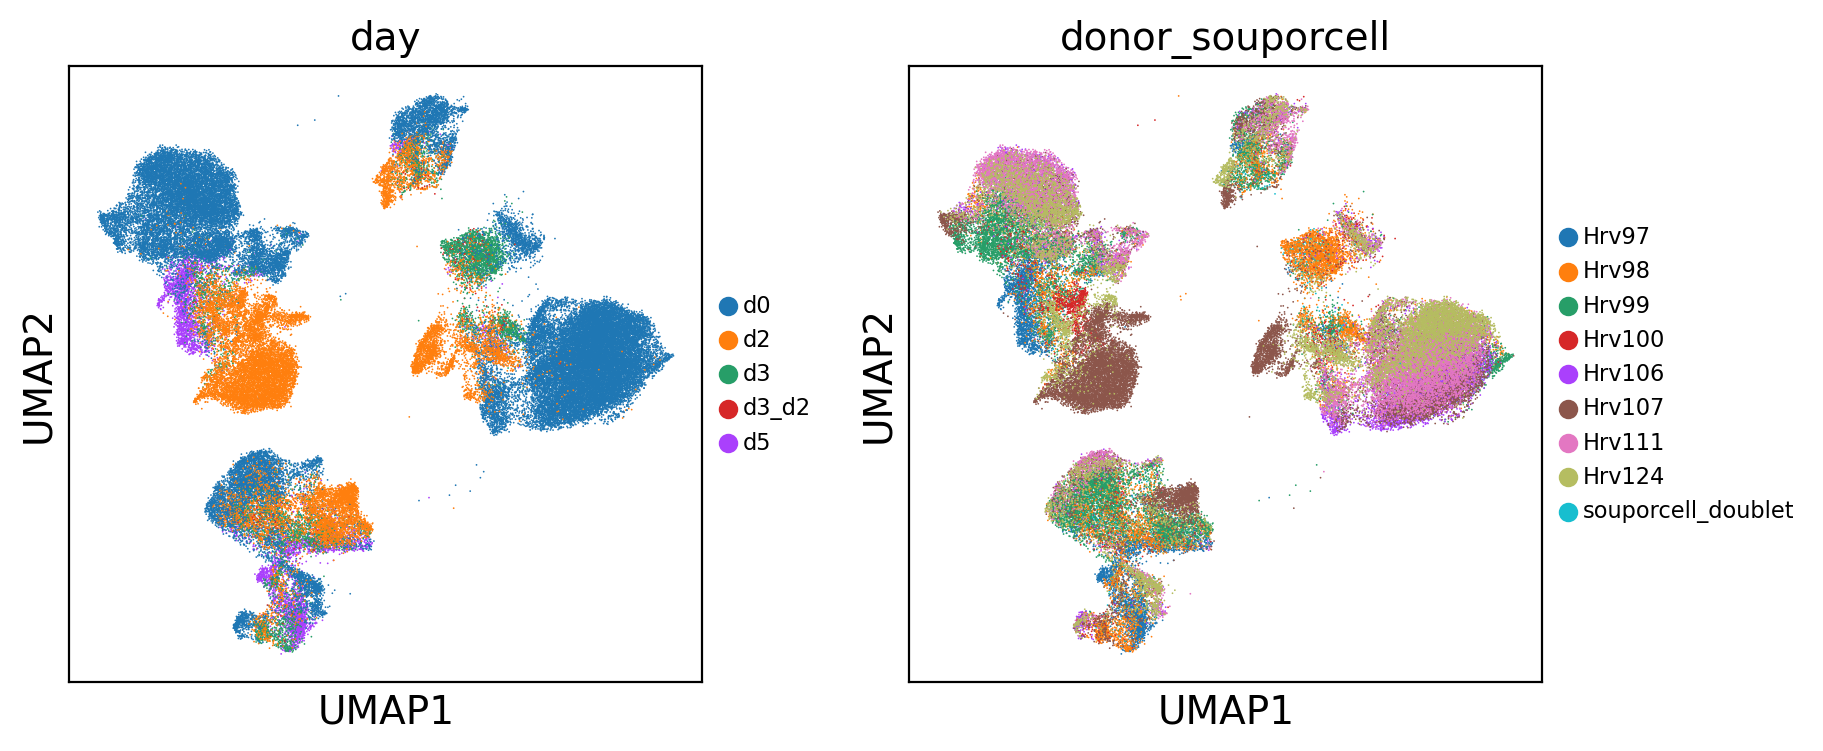

In [21]:
# use scVI imputed values for plottin
sc.pl.umap(fetal_adata, color=['day','donor_souporcell' ],legend_fontsize='xx-small',
           save='_scVI_latent30_cleanV4_fetal_day.pdf')

In [31]:
#fetal_adata.raw.write('../results/scVI/S2_scVIintegrated_adata_latent30_cleanV4_fetal.h5ad')

In [5]:
#adata= sc.read('../results/scVI/S2_scVIintegrated_adata_latent30_cleanV4.h5ad')

In [22]:
del(fetal_adata)

## ----------


## Fibroblasts might have more than 2 sub-types


I will explore the annotation reported by:

**Suryawanshi, H., et al. (2018). A single-cell survey of the human first-trimester placenta and decidua. Science advances, 4(10), eaau4788.** 

In [7]:
#Selecting the cells in the desired clusters
temp_cells = adata[adata.obs['identity'] == 'F1']
temp_cells2= adata[adata.obs['identity'] == 'F2']

Fibroblasts = temp_cells.concatenate(temp_cells2, index_unique=None)

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [8]:
del(temp_cells, temp_cells2)

... storing 'sample' as categorical
... storing 'termination' as categorical
... storing 'day' as categorical
... storing 'pcw' as categorical
... storing 'souporcell_id' as categorical
... storing 'donor_deconv' as categorical
... storing 'donor_souporcell' as categorical
... storing 'leiden_pca' as categorical
... storing 'leiden_scvi' as categorical
... storing 'celltype_predictions' as categorical
... storing 'souporcell_MFgenotype' as categorical
... storing 'identity' as categorical
... storing 'souporcell_MFidentity' as categorical


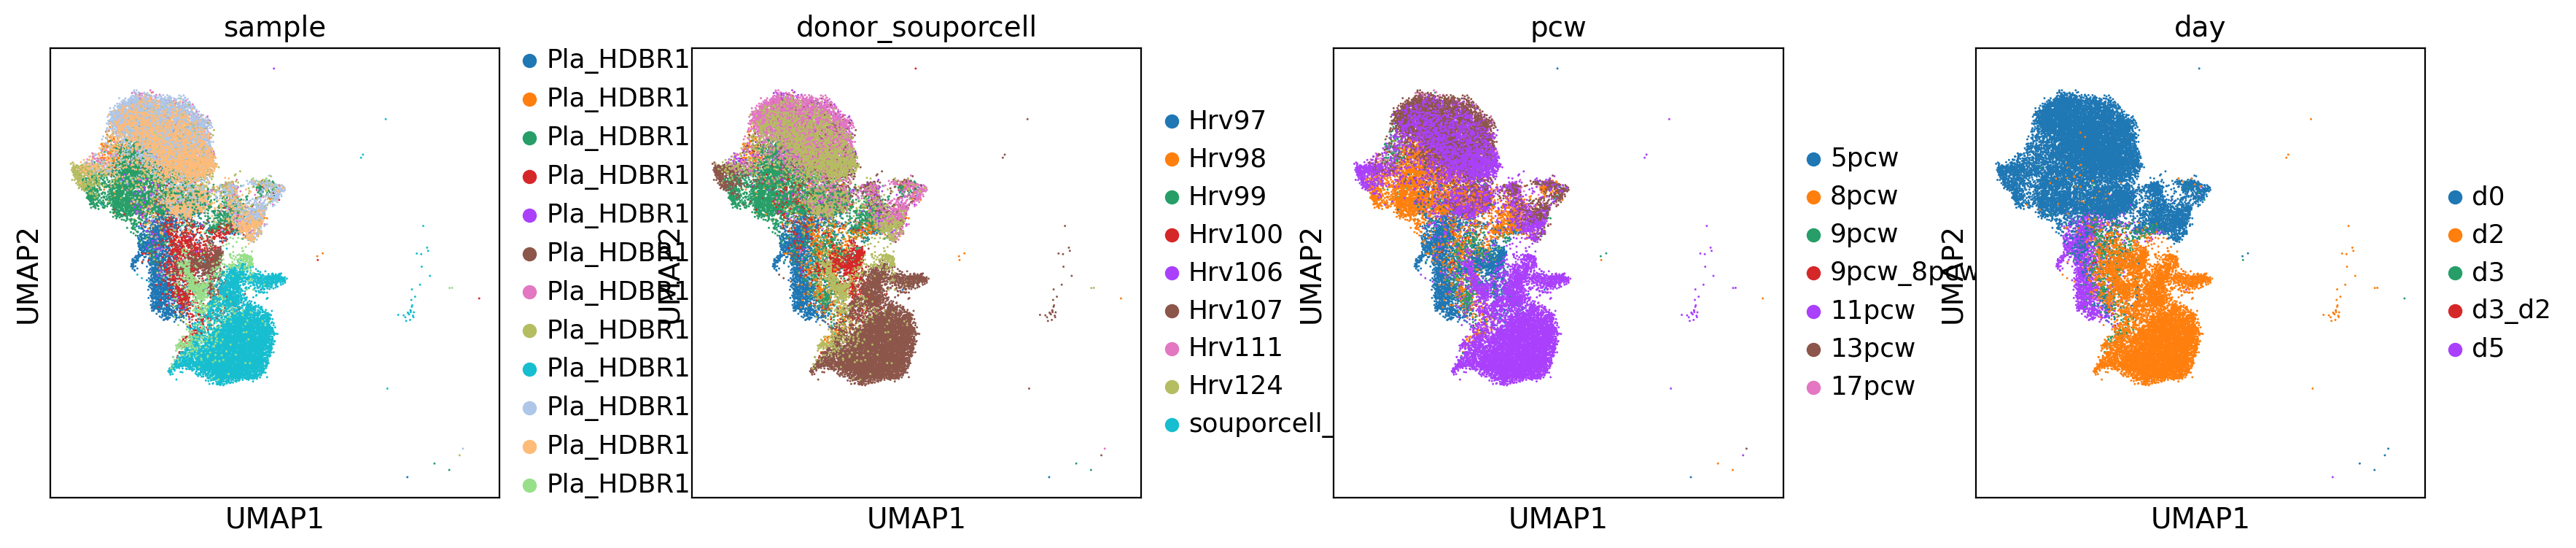

In [9]:
sc.pl.umap(Fibroblasts, color=['sample','donor_souporcell', 'pcw','day'], color_map='OrRd',wspace=0.3, )

#### Fibroblasts differential markers reported by Vento-Tormo (2018) Nature.

F1: DKK1, SERPINE2


F2: PDGFRB, AGTR1

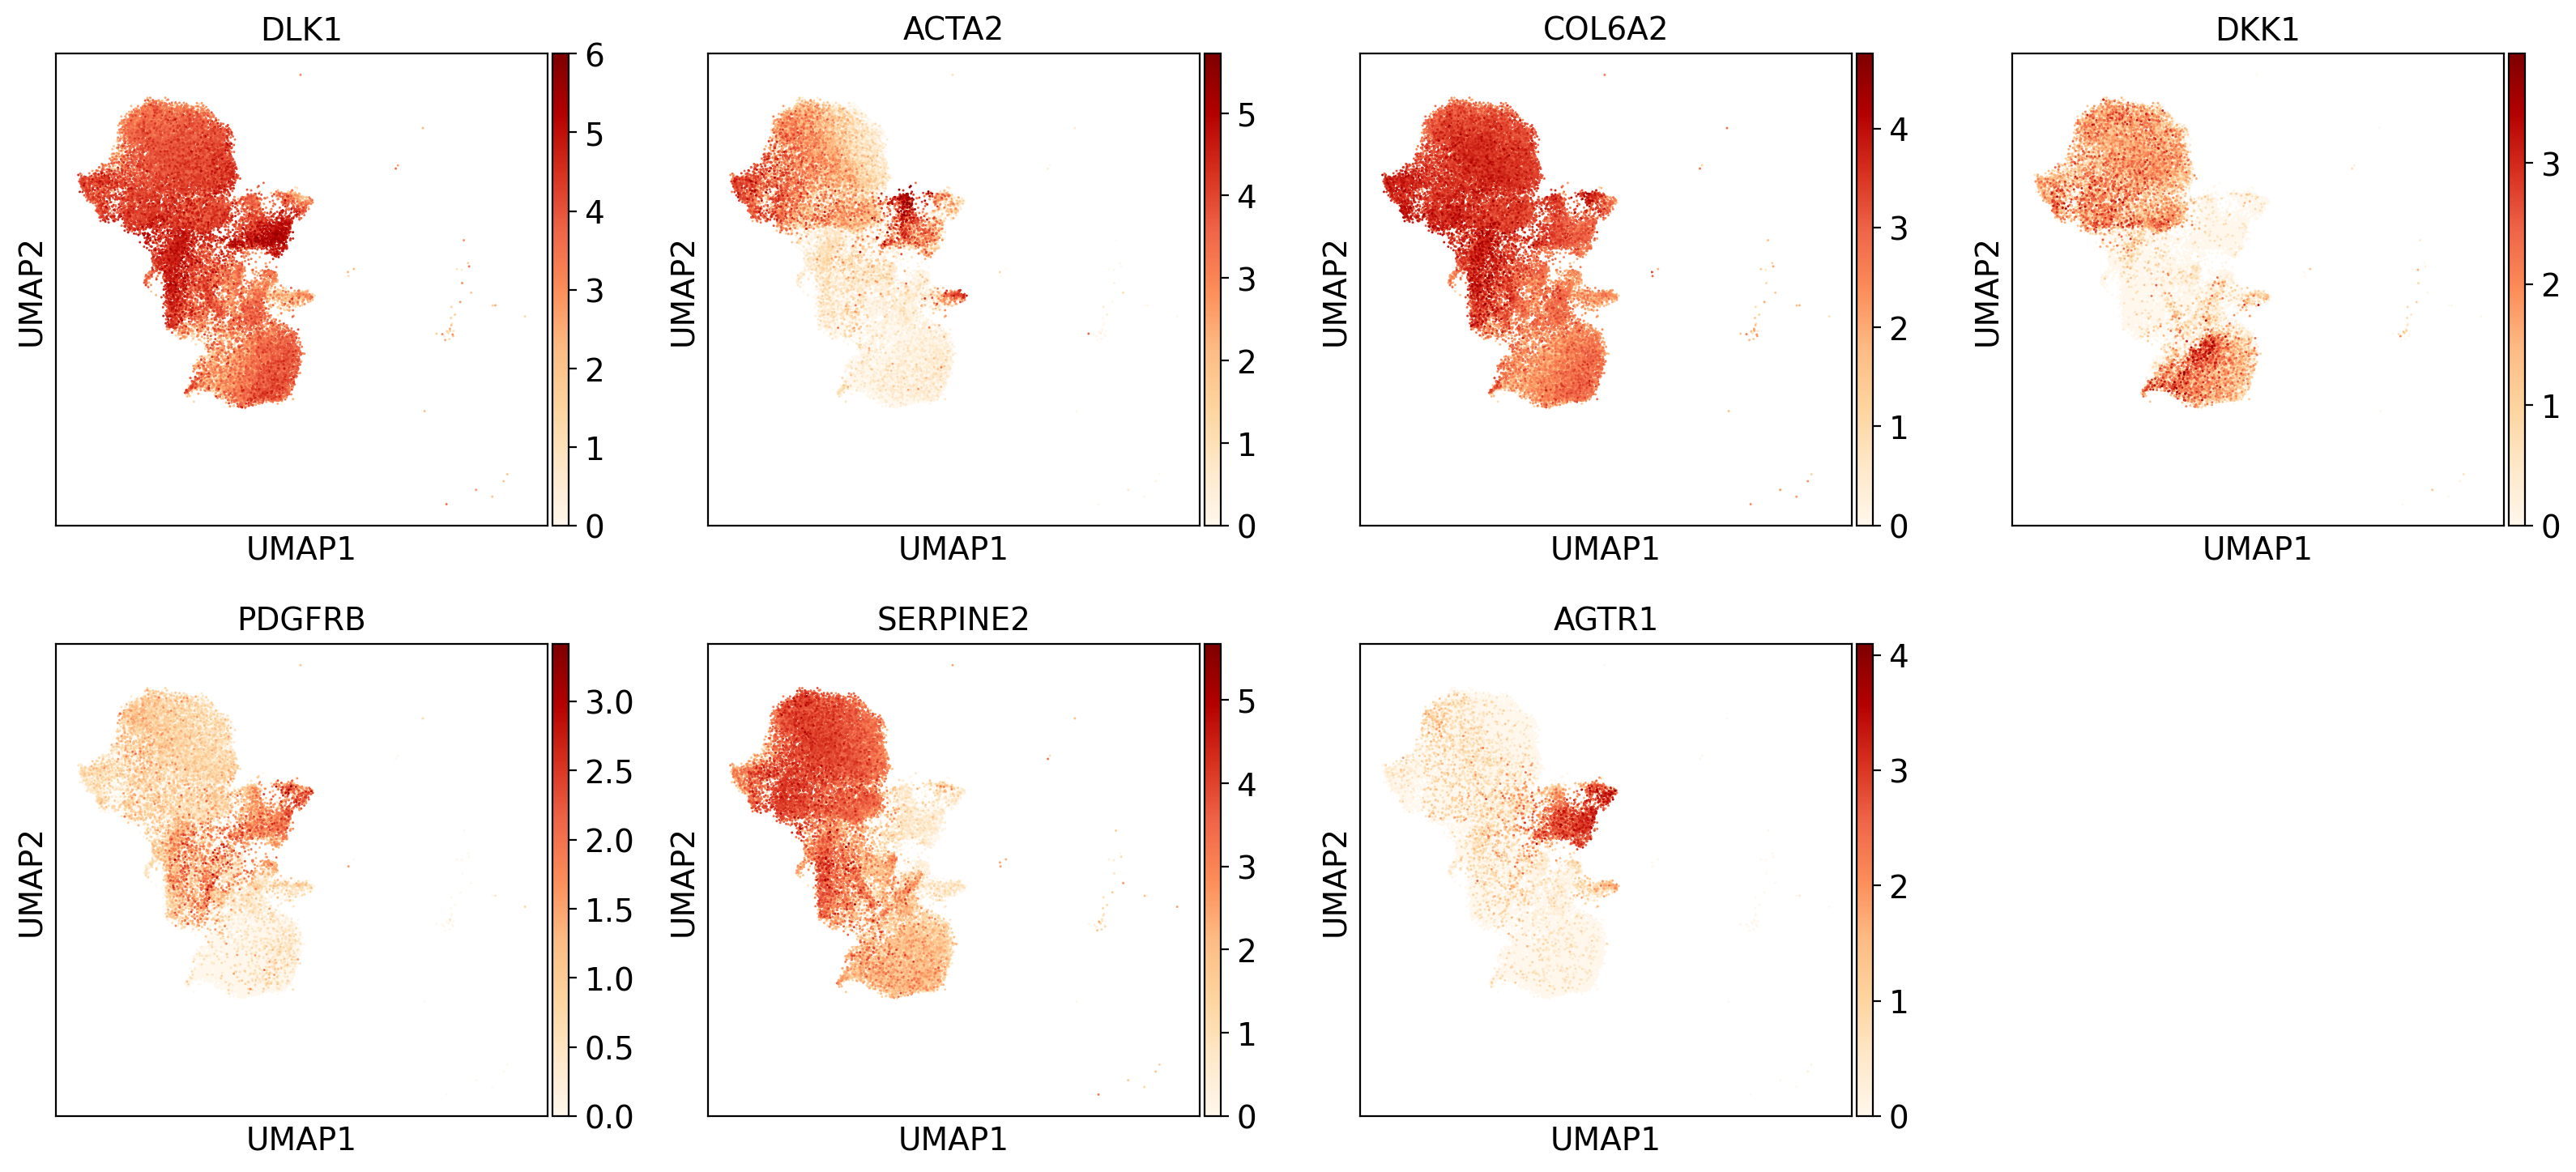

In [10]:
sc.pl.umap(Fibroblasts, color=['DLK1', 'ACTA2', 'COL6A2', 'DKK1','PDGFRB','SERPINE2','AGTR1'], color_map='OrRd')

#### Fibroblasts differential markers reported by Suryawanshi, H., et al. (2018) Science advances.

F1: COL1A1, COL1A2, COL3A1, OGN, S100A4


F2: REN, AGTR1, IGFBP7, AREG

F3: IL6, PTHDS, CFD, CXCL2, BDKRB1

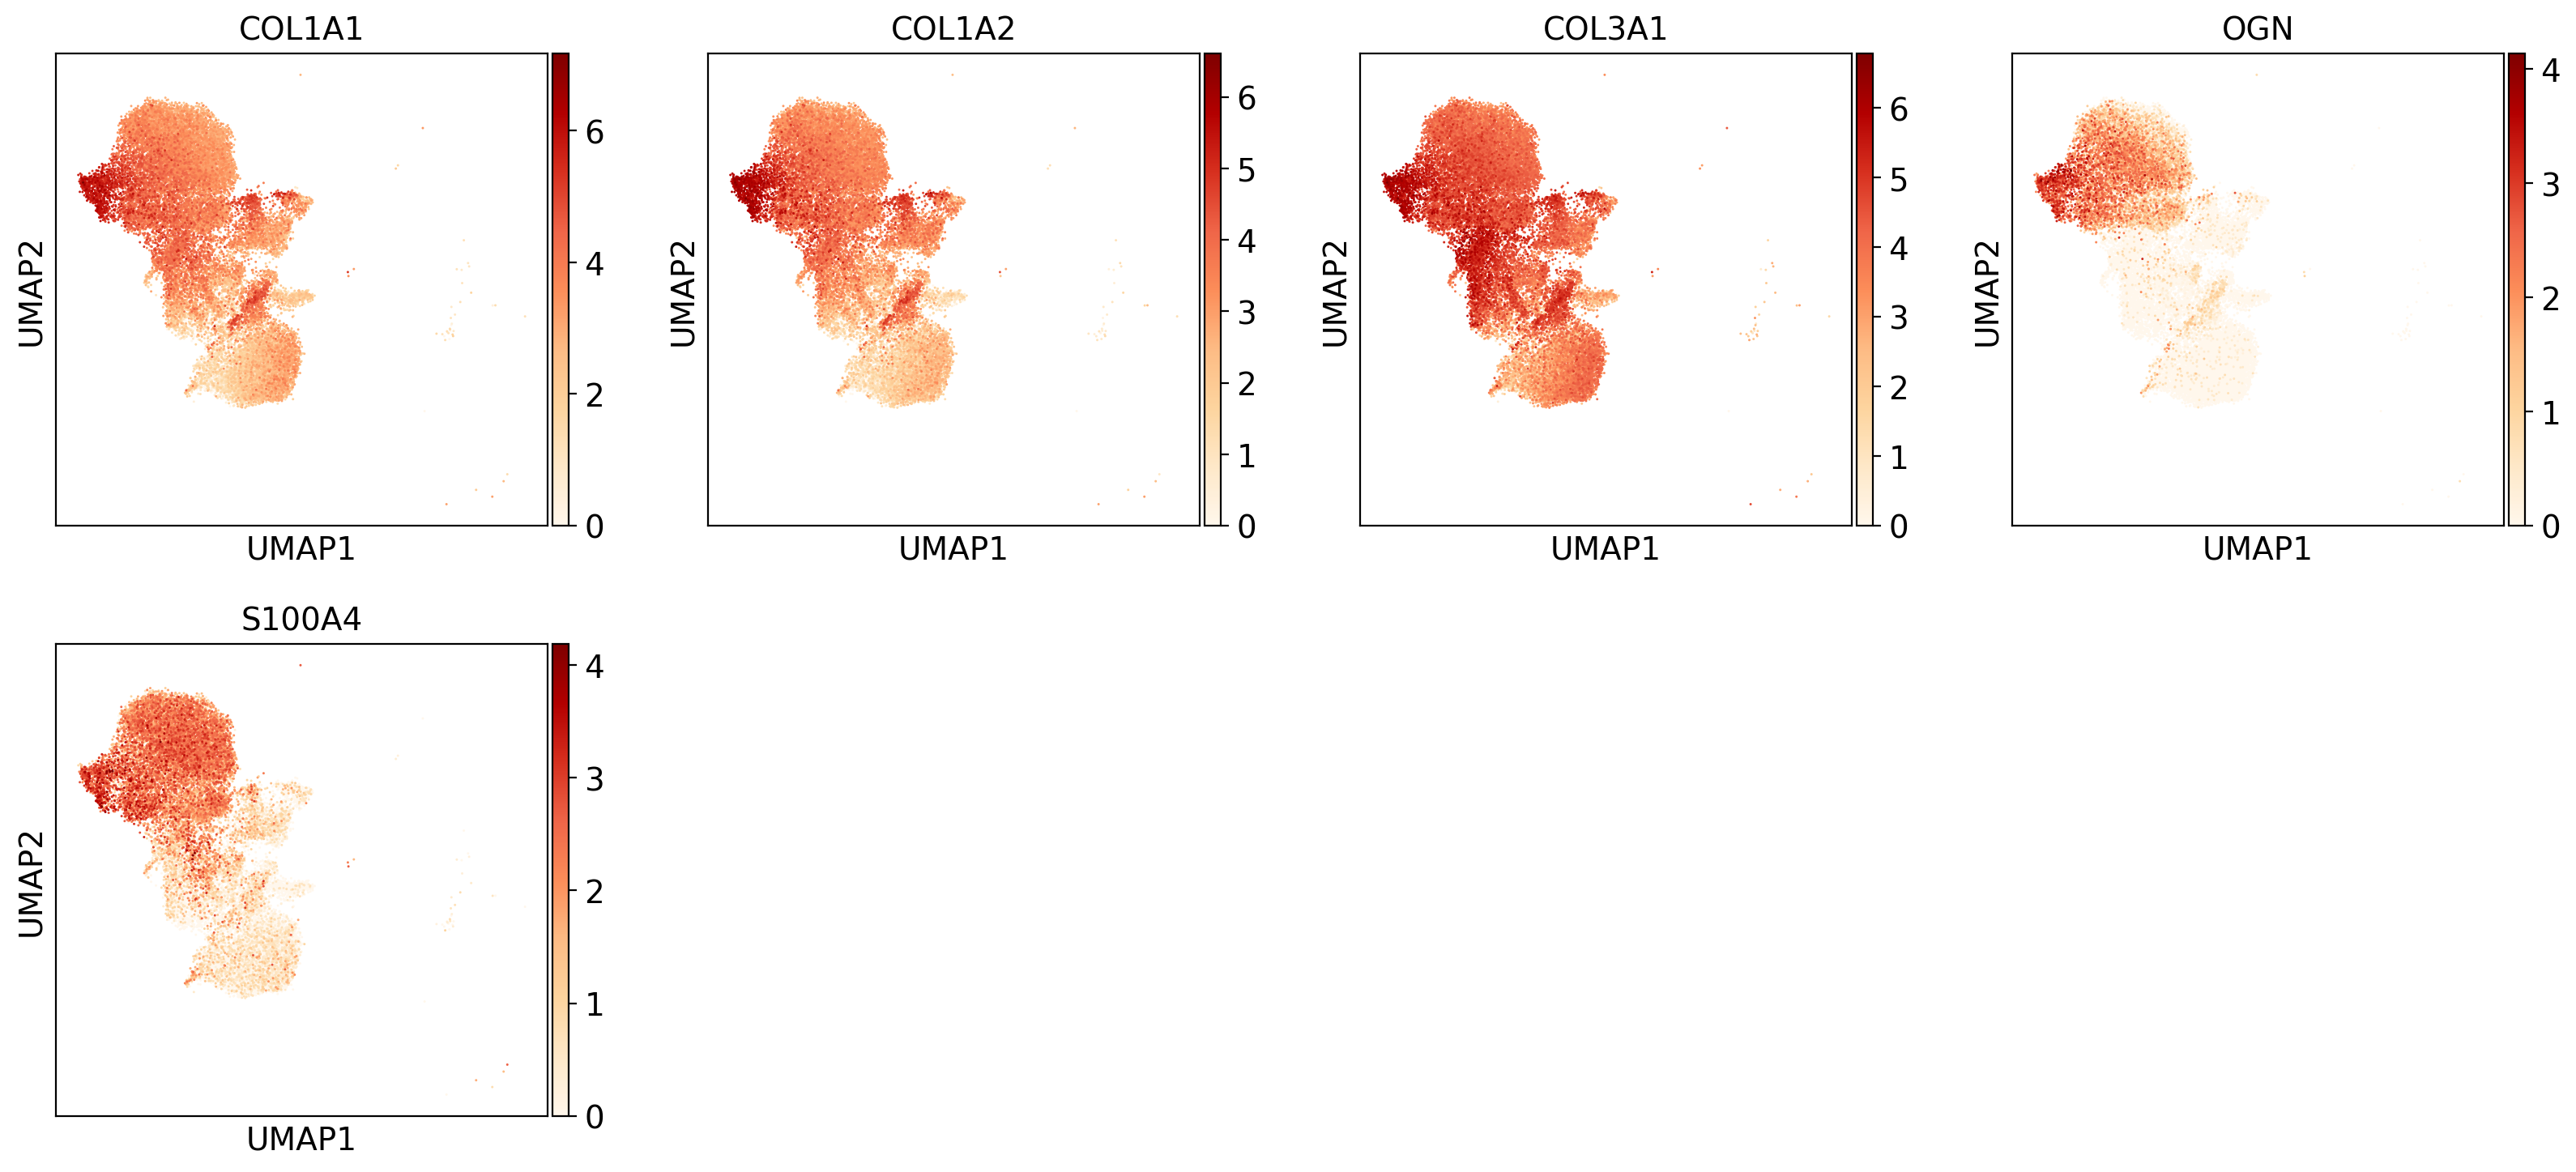

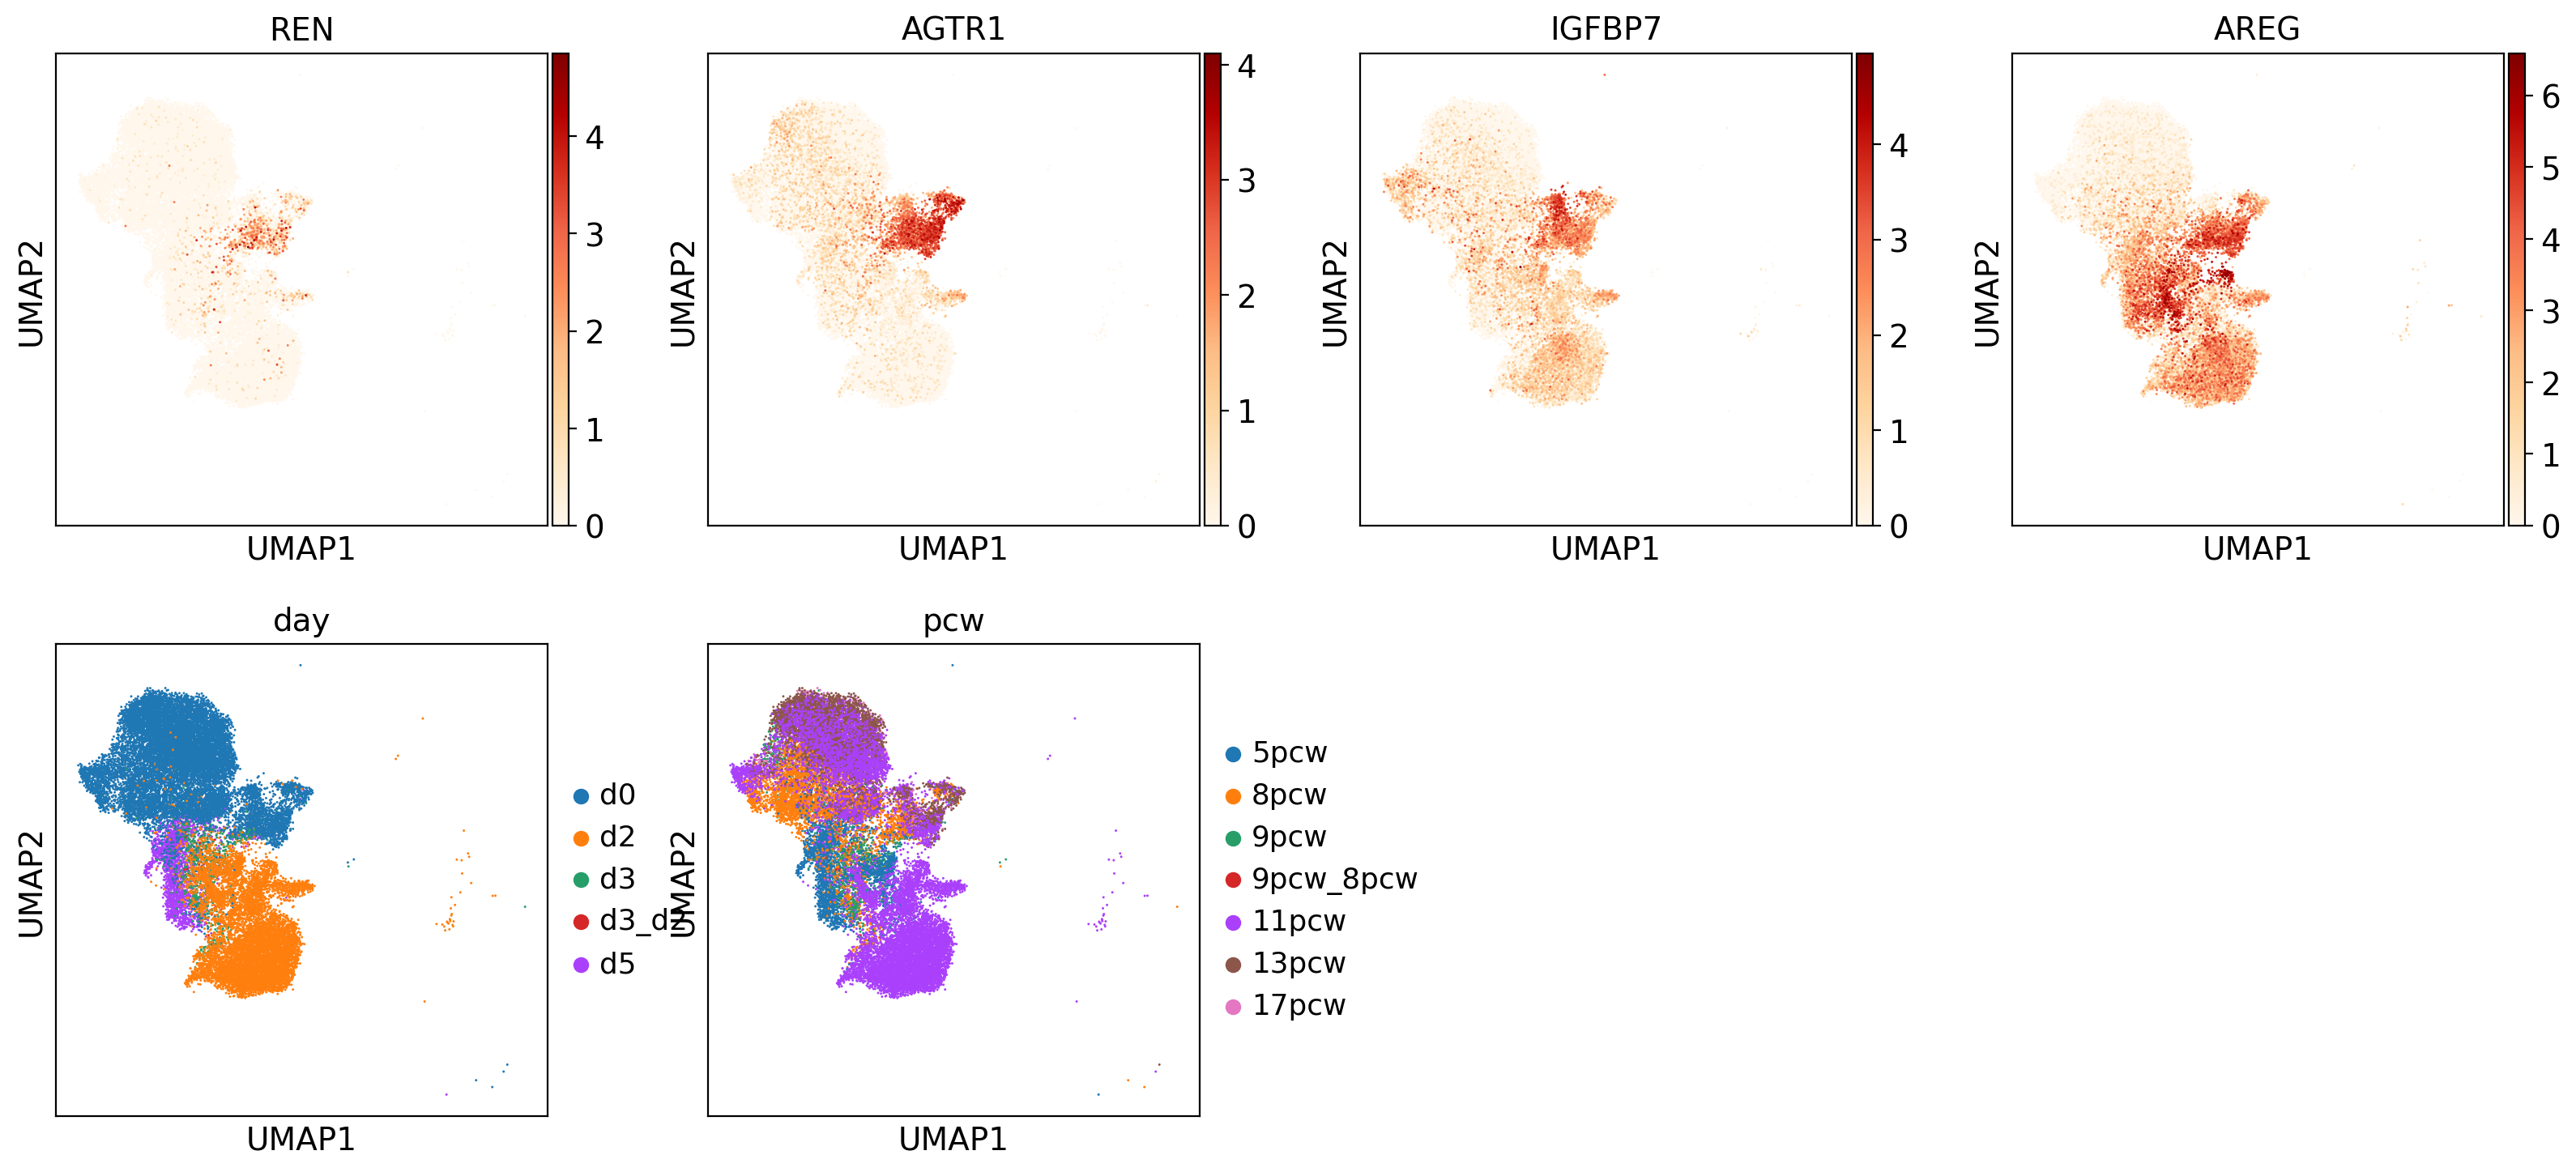

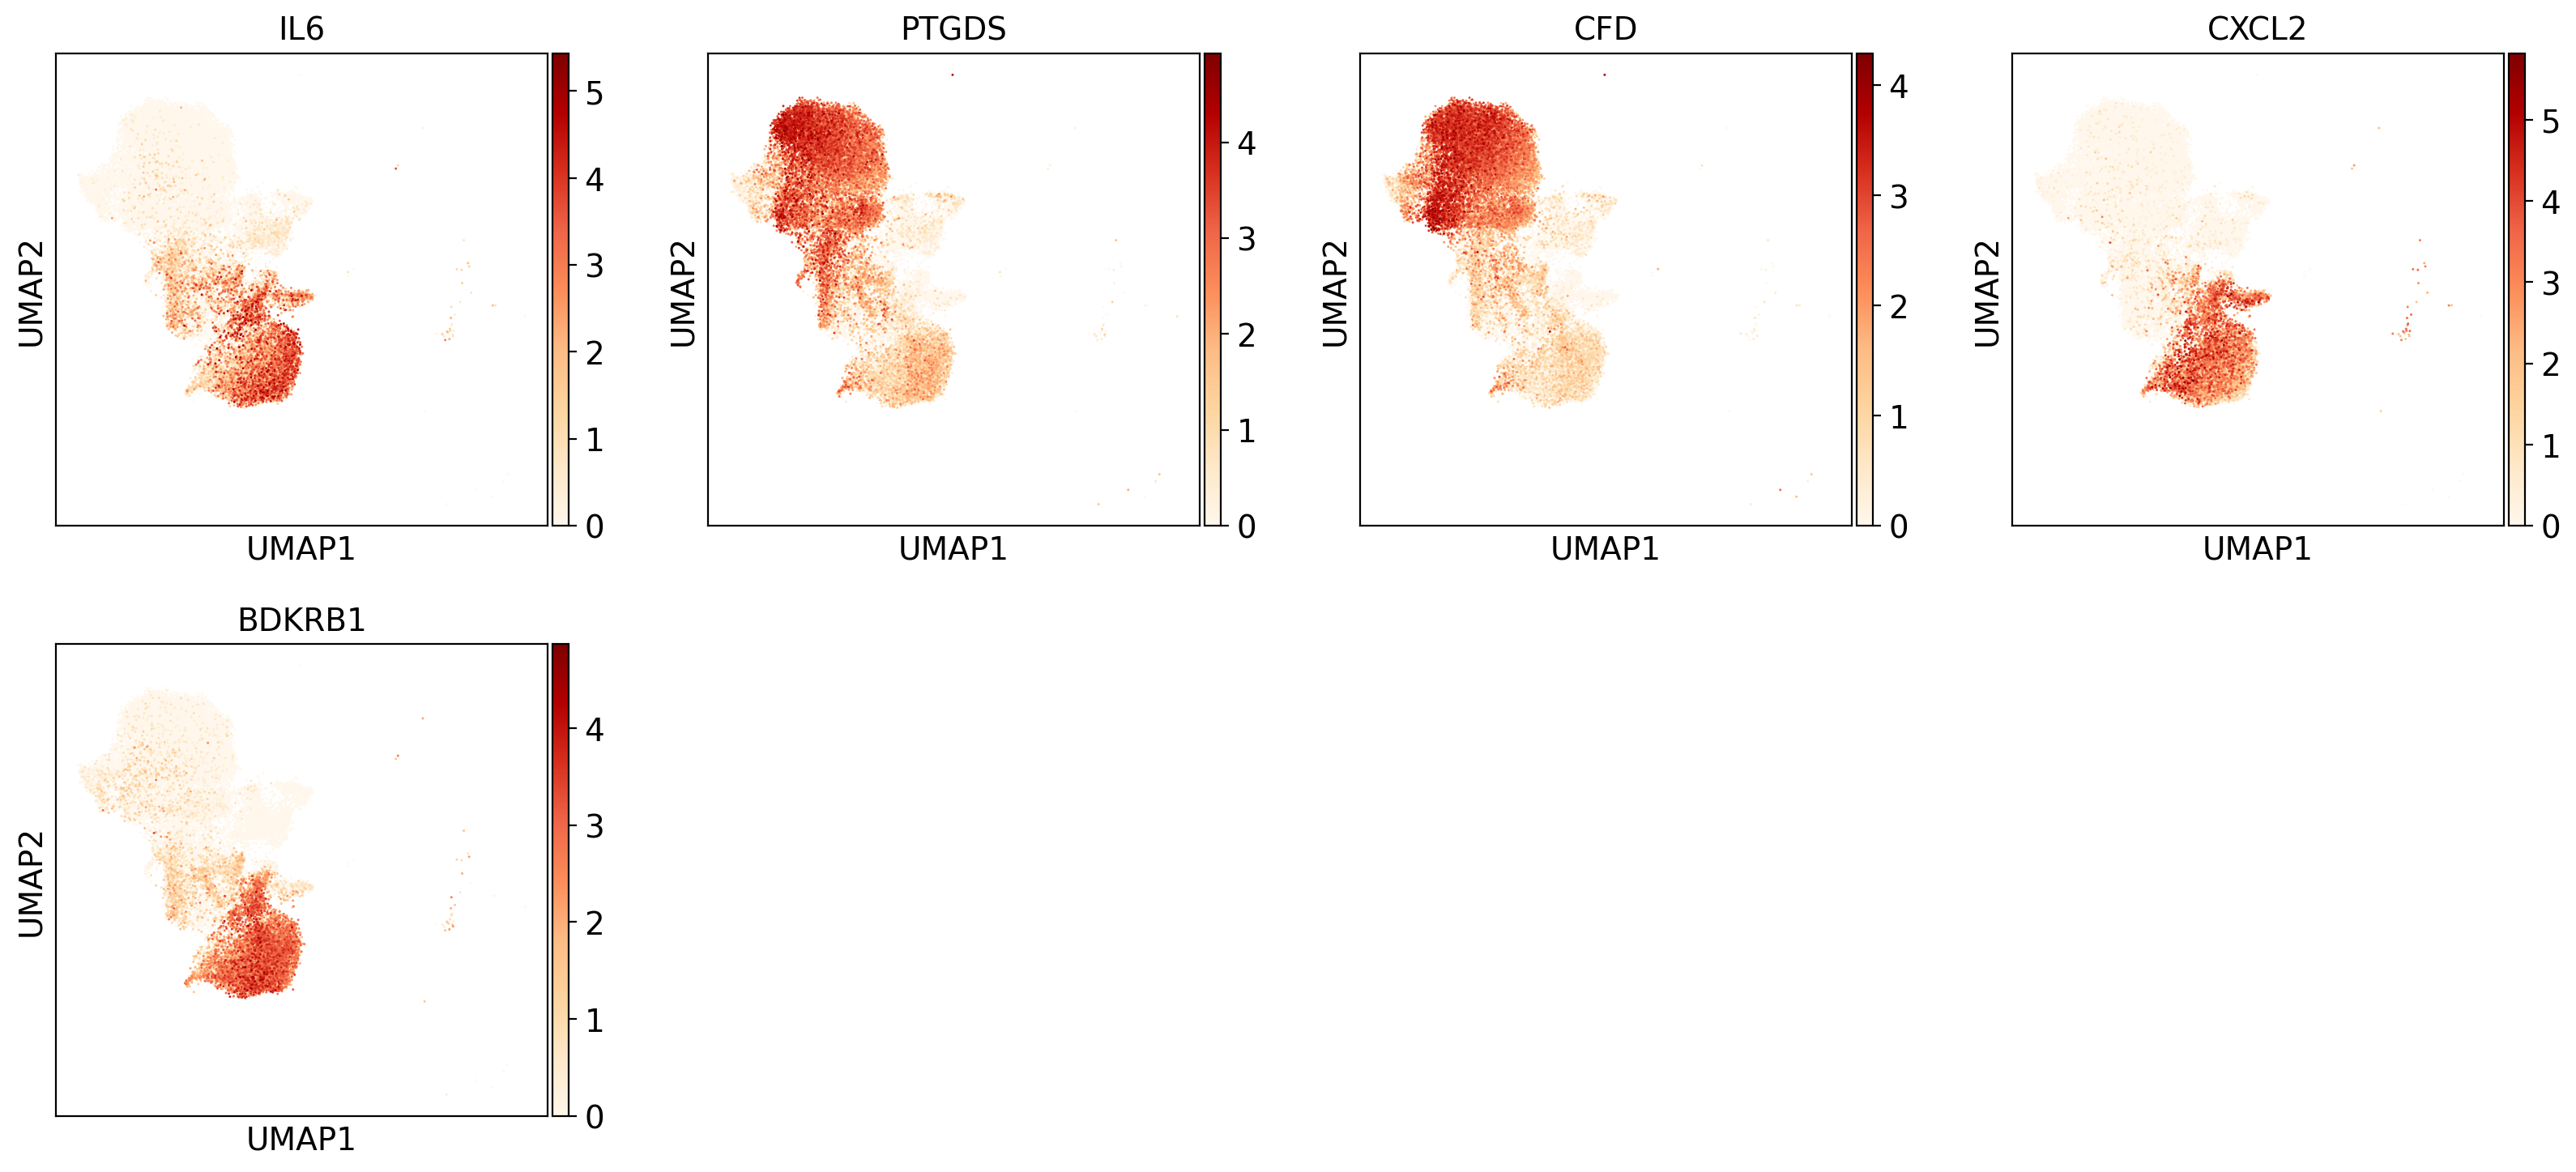

In [13]:
sc.pl.umap(Fibroblasts, color=['COL1A1', 'COL1A2', 'COL3A1', 'OGN','S100A4'], color_map='OrRd',save='_scVI_latent30_cleanV4_fetal_SuryawanshiF1.pdf')
sc.pl.umap(Fibroblasts, color=['REN', 'AGTR1', 'IGFBP7', 'AREG','day','pcw'], color_map='OrRd',save='_scVI_latent30_cleanV4_fetal_SuryawanshiF2.pdf')
sc.pl.umap(Fibroblasts, color=['IL6', 'PTGDS', 'CFD', 'CXCL2','BDKRB1'], color_map='OrRd',save='_scVI_latent30_cleanV4_fetal_SuryawanshiF3.pdf')

It looks like the 3 clusters found in my data correspond well to the 3 sub-types reported by this paper.

In [14]:
#LATENT 30
sc.pp.neighbors(Fibroblasts, n_neighbors=20, use_rep="X_scVI_n_latent_30")
sc.tl.umap(Fibroblasts)

#clustering
sc.tl.leiden(Fibroblasts, key_added="leiden_scvi", resolution=0.2)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:30)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:04)


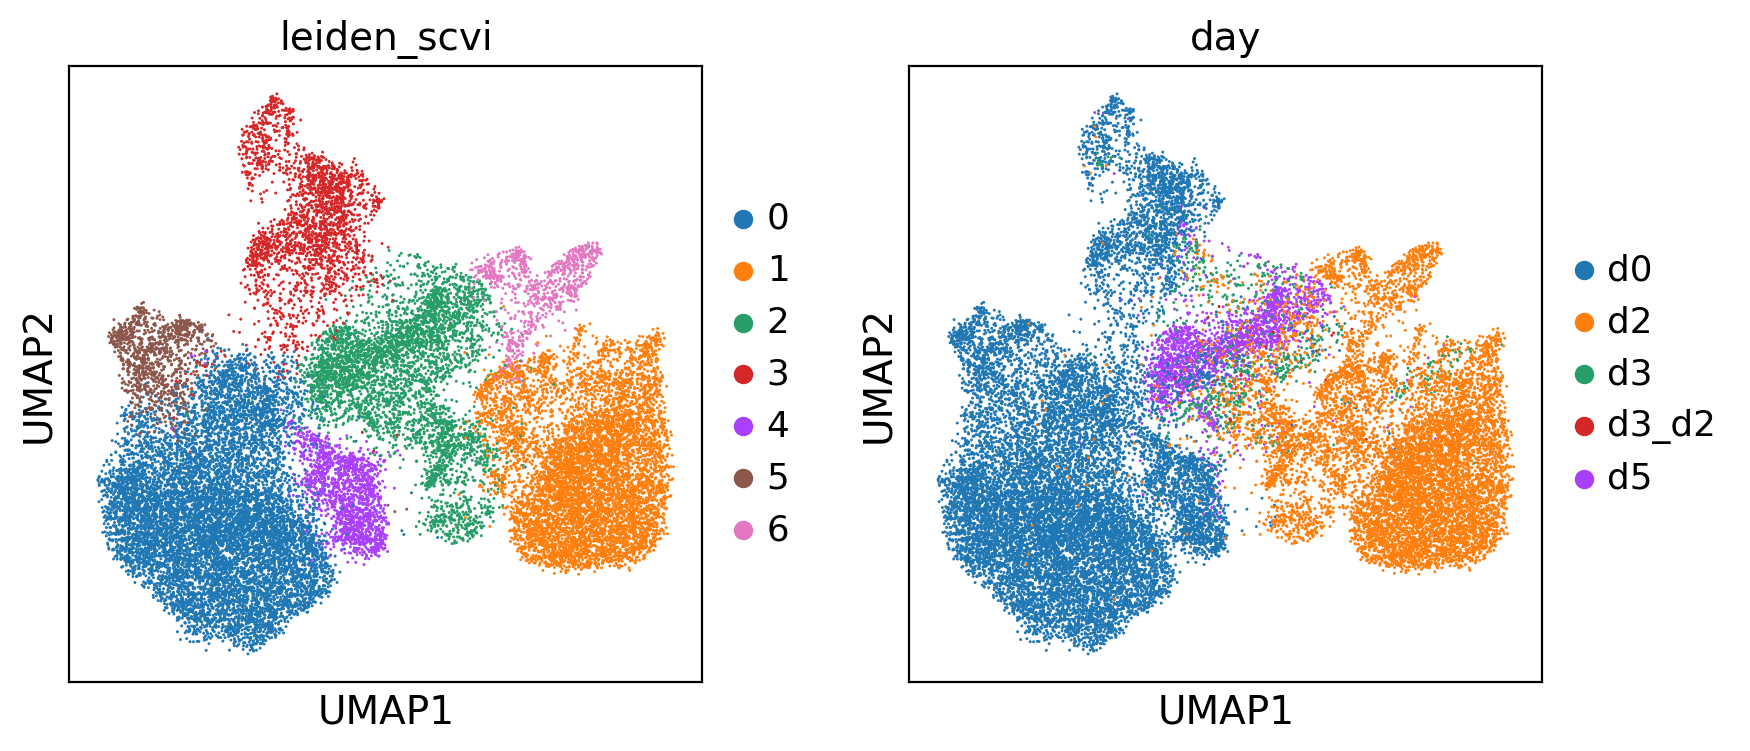

In [19]:

#clustering
sc.pl.umap(Fibroblasts, color=["leiden_scvi",'day'])

In [16]:
marker_genes = {
    'F1':{'COL1A1', 'COL1A2', 'COL3A1', 'OGN','S100A4'}, 
    'F2': {'REN', 'AGTR1', 'IGFBP7', 'AREG'},
    'F3':{'IL6', 'PTGDS', 'CFD', 'CXCL2','BDKRB1'},
}

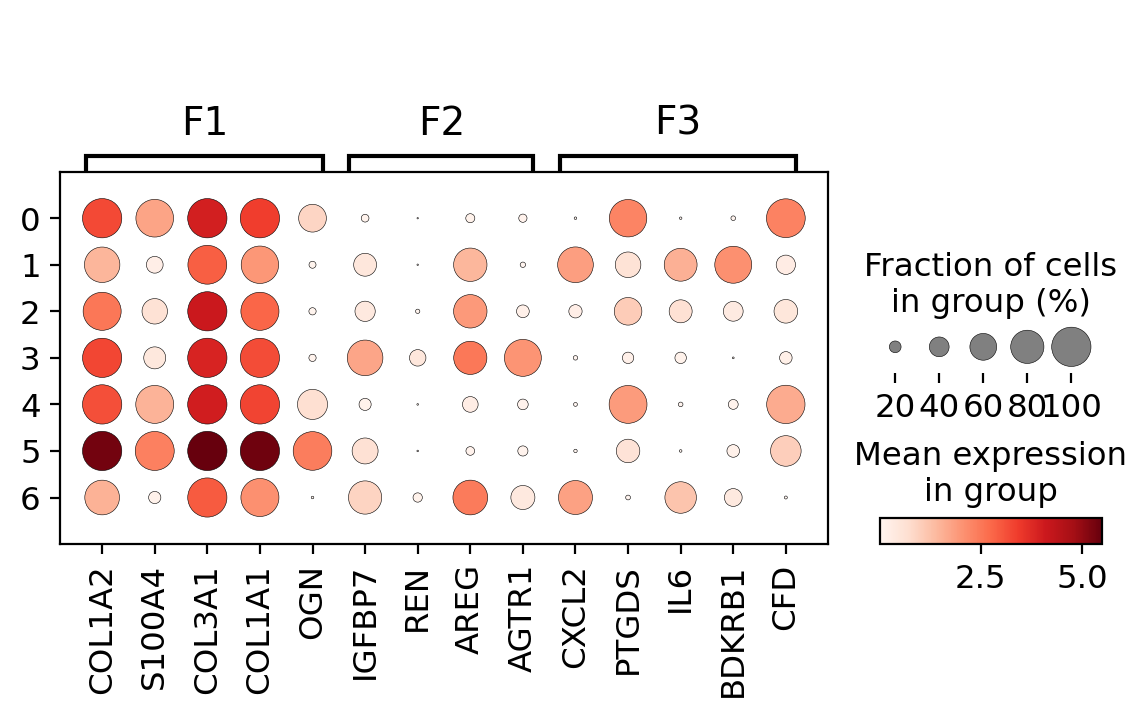

In [18]:
sc.pl.dotplot(Fibroblasts, marker_genes, groupby='leiden_scvi', use_raw=False)

## NOTE:


Even though some of the clusters seem to express the markers for F3, I noticed that these clusters come mainly from explant data (d2, d5). This means that this inflammatory phenotype could be due to the culture system rather than being a different cell type. I will better keep the current annotation and dig further in the future once I am using only the cleaned data (i.e. without medical and old samples)